# Exercises 10 - 11/12/2023

In [1]:
import scipy.stats as sc
import numpy as np 
from mylib.radom_numbers import rand_expon
import matplotlib.pyplot as plt

## Exercise 10.1

Write a library of functions to determine the parameter τ of an exponential distribution from a list of numbers filled with pseudo-random numbers distributed according to an exponential probability density distribution.

Compare the result obtained with the mean of the numbers saved in the list.

How does the result depend on the initial interval passed to the sezione_aurea_max_LL function?

In [83]:
from mylib.function_study import maximum
from mylib.parameters_estimator import loglikelyhood, exponential_pdf

true_t0 = 5
data = rand_expon(true_t0,size=10000)

a,b = 1,10
t0s = np.linspace(a,b,100)
logL = np.array([loglikelyhood(exponential_pdf,data,t) for t in t0s])

eval_h = logL - np.max(logL) + 0.5 # evaluated h function
h = lambda x: loglikelyhood(exponential_pdf,data,x) - np.max(logL) + 0.5 # h(x)

t0_hat = maximum(h,a,a + 0.382*(b-a),a + 0.618*(b-a),b)
print('t0 hat (tau): ',t0_hat)
print('mean t0 (tau): ',np.mean(data))

# plt.plot(t0s,eval_h)
# plt.ylim(-1,1)
# plt.show()

t0 hat (tau):  4.983193012375058
mean t0 (tau):  4.983185785683953


The interval passed to *sezione_aurea_max_LL* does not effect the value of $\tau$.
If the maximum of the function is not in the interval max=a or b

## Exercise 10.2
Plot the profile of the likelihood function and the point identified as its maximum.

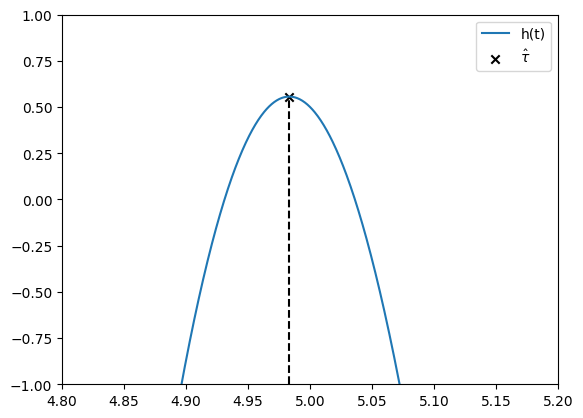

In [101]:
X = np.linspace(4.8,5.2,1000)
plt.plot(X,[h(x) for x in X],label='h(t)')
plt.scatter(t0_hat,h(t0_hat),marker='x',color='black',label='$\hat{\\tau}$')
plt.plot(np.ones(100)*t0_hat,np.linspace(-1,h(t0_hat),100),linestyle='--',color='black')
plt.xlim(4.8,5.2)
plt.ylim(-1,1)
plt.legend()
plt.show()

## Exercises 10.3
Modify the sezione_aurea_max_LL function, adding the printing of the interval endpoint values at each iteration, to observe the narrowing of the interval during program execution.

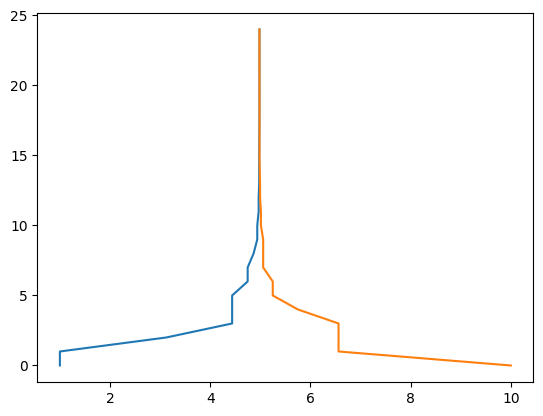

In [103]:
A = []
B = []
def maximum(f,a,x1,x2,b,prec = 0.0001):
    global A
    global B
    A.append(a)
    B.append(b)
    if np.abs(b - a) < prec: return x2
    if f(x1) > f(x2): return maximum(f,a,a+(1-0.618)*(x2-a),x1,x2,prec)
    else: return maximum(f,x1,x2,x1+0.618*(b-x1),b,prec)

maximum(h,a,a + 0.382*(b-a),a + 0.618*(b-a),b)

Y = np.arange(0,len(A))
plt.plot(A,Y)
plt.plot(B,Y)
plt.show()

## Exercise 10.4
Modify the loglikelihood function to calculate the logarithm of the product of the values of the probability density function, rather than the sum of individual logarithms. How does the algorithm’s behavior change